In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls /content/gdrive/My\ Drive/eva-04/S9/* 

We'll need to update our path to import from Drive.

In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/eva-04/S9/')

Now we can import the library and use the function.

In [3]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize
from albumentations.pytorch import ToTensor
from models import Resnet18 as resnet18
from transformations import CIFARModel10_Alb as cifar

import importlib
importlib.reload(resnet18)
importlib.reload(cifar)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = resnet18.ResNet18().to(device)

SEED = 1
# CUDA?
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
#dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if use_cuda else dict(shuffle=True, batch_size=64)

# train dataloader
#train_loader = torch.utils.data.DataLoader(g_train, **dataloader_args)

# test dataloader
#test_loader = torch.utils.data.DataLoader(g_test, **dataloader_args)
import images as im
import random
X,Y,names = im.get_data('cifar-10-batches-py/data_batch_1')
import numpy as np
import matplotlib.pyplot as plt
import os
importlib.reload(im)
#for x in range(100):
#  im.visualize_image(X,Y,names,random.randint(1,10000),'/content/gdrive/My Drive/eva-04/S9/images')


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
cuda
CUDA Available? True


<module 'images' from '/content/gdrive/My Drive/eva-04/S9/images.py'>

SHOW PARAMETERS

In [4]:
from utils.global_fun import test_model
from utils.global_fun import train_model
from utils.global_fun import show_summary, run_model_with_entropy,  draw_accuracy_loss_change_graps

import utils.global_fun as fun
from models import Resnet18 as resnet18
from transformations import CIFARModel10_Alb as cifar

import importlib
importlib.reload(resnet18)
importlib.reload(cifar)
importlib.reload(fun)



cifar_model = cifar.CIFARModel10_Alb(model)
show_summary(cifar_model,input_size=(3,32,32))


Files already downloaded and verified
Files already downloaded and verified
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13       

RUNNING WITH REGULARIZATION

In [5]:
run_model_with_entropy(cifar_model, device, doL1= 1, doL2=1, LAMBDA=0.0005, EPOCHS=50)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 0


Loss=59.70903778076172 Batch_id=195 Accuracy=25.97: 100%|██████████| 196/196 [00:41<00:00,  4.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 3668/10000 (36.68%)

EPOCH: 1
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 1


Loss=59.436920166015625 Batch_id=195 Accuracy=35.80: 100%|██████████| 196/196 [00:41<00:00,  4.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 4176/10000 (41.76%)

EPOCH: 2
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 2


Loss=59.423397064208984 Batch_id=195 Accuracy=40.73: 100%|██████████| 196/196 [00:41<00:00,  4.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 4742/10000 (47.42%)

EPOCH: 3
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 3


Loss=59.15814208984375 Batch_id=195 Accuracy=43.81: 100%|██████████| 196/196 [00:41<00:00,  4.73it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 5047/10000 (50.47%)

EPOCH: 4
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 4


Loss=59.20734786987305 Batch_id=195 Accuracy=46.21: 100%|██████████| 196/196 [00:42<00:00,  4.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 5145/10000 (51.45%)

EPOCH: 5
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 5


Loss=59.06283187866211 Batch_id=195 Accuracy=48.32: 100%|██████████| 196/196 [00:42<00:00,  4.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 5117/10000 (51.17%)

EPOCH: 6
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 6


Loss=59.11922073364258 Batch_id=195 Accuracy=49.85: 100%|██████████| 196/196 [00:41<00:00,  4.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 5283/10000 (52.83%)

EPOCH: 7
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 7


Loss=58.76569747924805 Batch_id=195 Accuracy=51.40: 100%|██████████| 196/196 [00:42<00:00,  4.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 5224/10000 (52.24%)

EPOCH: 8
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 8


Loss=58.69377899169922 Batch_id=195 Accuracy=52.85: 100%|██████████| 196/196 [00:41<00:00,  4.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 5760/10000 (57.60%)

EPOCH: 9
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 9


Loss=58.6497802734375 Batch_id=195 Accuracy=53.92: 100%|██████████| 196/196 [00:42<00:00,  4.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 5989/10000 (59.89%)

EPOCH: 10
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 10


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 5843/10000 (58.43%)

EPOCH: 11
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 11


Loss=58.51093673706055 Batch_id=195 Accuracy=56.28: 100%|██████████| 196/196 [00:42<00:00,  4.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 6043/10000 (60.43%)

EPOCH: 12
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 12


Loss=58.44878005981445 Batch_id=195 Accuracy=57.08: 100%|██████████| 196/196 [00:42<00:00,  4.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 6308/10000 (63.08%)

EPOCH: 13
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 13


Loss=58.446922302246094 Batch_id=195 Accuracy=58.17: 100%|██████████| 196/196 [00:42<00:00,  4.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 6294/10000 (62.94%)

EPOCH: 14
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 14


Loss=58.4563102722168 Batch_id=195 Accuracy=59.07: 100%|██████████| 196/196 [00:42<00:00,  4.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6600/10000 (66.00%)

EPOCH: 15
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 15


Loss=58.377567291259766 Batch_id=195 Accuracy=59.99: 100%|██████████| 196/196 [00:42<00:00,  4.61it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 6509/10000 (65.09%)

EPOCH: 16
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 16


Loss=58.080726623535156 Batch_id=195 Accuracy=60.38: 100%|██████████| 196/196 [00:42<00:00,  4.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6589/10000 (65.89%)

EPOCH: 17
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 17


Loss=58.12089157104492 Batch_id=195 Accuracy=61.29: 100%|██████████| 196/196 [00:41<00:00,  4.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6644/10000 (66.44%)

EPOCH: 18
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 18


Loss=57.966522216796875 Batch_id=195 Accuracy=61.90: 100%|██████████| 196/196 [00:42<00:00,  4.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6952/10000 (69.52%)

EPOCH: 19
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 19


Loss=57.86774444580078 Batch_id=195 Accuracy=62.35: 100%|██████████| 196/196 [00:41<00:00,  4.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6836/10000 (68.36%)

EPOCH: 20
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 20


Loss=57.805458068847656 Batch_id=195 Accuracy=63.56: 100%|██████████| 196/196 [00:42<00:00,  4.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7083/10000 (70.83%)

EPOCH: 21
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 21


Loss=57.71817398071289 Batch_id=195 Accuracy=63.83: 100%|██████████| 196/196 [00:41<00:00,  4.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6806/10000 (68.06%)

EPOCH: 22
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 22


Loss=57.82354736328125 Batch_id=195 Accuracy=64.60: 100%|██████████| 196/196 [00:41<00:00,  4.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7157/10000 (71.57%)

EPOCH: 23
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 23


Loss=57.755733489990234 Batch_id=195 Accuracy=65.20: 100%|██████████| 196/196 [00:42<00:00,  4.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7146/10000 (71.46%)

EPOCH: 24
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 24


Loss=57.486019134521484 Batch_id=195 Accuracy=65.88: 100%|██████████| 196/196 [00:41<00:00,  4.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7226/10000 (72.26%)

EPOCH: 25
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 25


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7166/10000 (71.66%)

EPOCH: 26
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 26


Loss=57.392005920410156 Batch_id=195 Accuracy=66.89: 100%|██████████| 196/196 [00:41<00:00,  4.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6992/10000 (69.92%)

EPOCH: 27
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 27


Loss=57.249141693115234 Batch_id=195 Accuracy=67.37: 100%|██████████| 196/196 [00:42<00:00,  4.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7472/10000 (74.72%)

EPOCH: 28
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 28


Loss=57.317901611328125 Batch_id=195 Accuracy=67.75: 100%|██████████| 196/196 [00:42<00:00,  4.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7415/10000 (74.15%)

EPOCH: 29
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 29


Loss=57.219181060791016 Batch_id=195 Accuracy=68.62: 100%|██████████| 196/196 [00:41<00:00,  4.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7409/10000 (74.09%)

EPOCH: 30
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 30


Loss=57.19136428833008 Batch_id=195 Accuracy=69.00: 100%|██████████| 196/196 [00:42<00:00,  4.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7568/10000 (75.68%)

EPOCH: 31
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 31


Loss=57.25480651855469 Batch_id=195 Accuracy=69.28: 100%|██████████| 196/196 [00:42<00:00,  4.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7463/10000 (74.63%)

EPOCH: 32
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 32


Loss=56.88612747192383 Batch_id=195 Accuracy=69.37: 100%|██████████| 196/196 [00:41<00:00,  4.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7564/10000 (75.64%)

EPOCH: 33
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 33


Loss=56.922821044921875 Batch_id=195 Accuracy=70.28: 100%|██████████| 196/196 [00:42<00:00,  4.62it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7490/10000 (74.90%)

EPOCH: 34
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 34


Loss=56.918304443359375 Batch_id=195 Accuracy=70.30: 100%|██████████| 196/196 [00:42<00:00,  4.61it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7503/10000 (75.03%)

EPOCH: 35
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 35


Loss=57.066829681396484 Batch_id=195 Accuracy=71.05: 100%|██████████| 196/196 [00:42<00:00,  4.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7532/10000 (75.32%)

EPOCH: 36
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 36


Loss=56.80021286010742 Batch_id=195 Accuracy=71.52: 100%|██████████| 196/196 [00:42<00:00,  4.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7657/10000 (76.57%)

EPOCH: 37
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 37


Loss=56.65458679199219 Batch_id=195 Accuracy=71.51: 100%|██████████| 196/196 [00:42<00:00,  4.58it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7506/10000 (75.06%)

EPOCH: 38
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 38


Loss=56.65021514892578 Batch_id=195 Accuracy=71.94: 100%|██████████| 196/196 [00:42<00:00,  4.58it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7804/10000 (78.04%)

EPOCH: 39
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 39


Loss=56.533756256103516 Batch_id=195 Accuracy=72.19: 100%|██████████| 196/196 [00:42<00:00,  4.58it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7872/10000 (78.72%)

EPOCH: 40
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 40


Loss=56.68698501586914 Batch_id=195 Accuracy=72.30: 100%|██████████| 196/196 [00:42<00:00,  4.59it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7845/10000 (78.45%)

EPOCH: 41
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 41


Loss=56.4938850402832 Batch_id=195 Accuracy=72.66: 100%|██████████| 196/196 [00:42<00:00,  4.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7842/10000 (78.42%)

EPOCH: 42
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 42


Loss=56.468563079833984 Batch_id=195 Accuracy=73.10: 100%|██████████| 196/196 [00:43<00:00,  4.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7675/10000 (76.75%)

EPOCH: 43
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 43


Loss=56.448787689208984 Batch_id=195 Accuracy=73.65: 100%|██████████| 196/196 [00:42<00:00,  4.60it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7830/10000 (78.30%)

EPOCH: 44
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 44


Loss=56.31852722167969 Batch_id=195 Accuracy=74.05: 100%|██████████| 196/196 [00:42<00:00,  4.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7878/10000 (78.78%)

EPOCH: 45
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 45


Loss=56.442596435546875 Batch_id=195 Accuracy=74.10: 100%|██████████| 196/196 [00:42<00:00,  4.62it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7892/10000 (78.92%)

EPOCH: 46
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 46


Loss=56.18205642700195 Batch_id=195 Accuracy=74.42: 100%|██████████| 196/196 [00:43<00:00,  4.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7883/10000 (78.83%)

EPOCH: 47
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 47


Loss=56.236209869384766 Batch_id=195 Accuracy=74.32: 100%|██████████| 196/196 [00:43<00:00,  4.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7856/10000 (78.56%)

EPOCH: 48
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 48


Loss=56.093387603759766 Batch_id=195 Accuracy=74.85: 100%|██████████| 196/196 [00:42<00:00,  4.58it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8071/10000 (80.71%)

EPOCH: 49
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 49


Loss=56.118682861328125 Batch_id=195 Accuracy=75.16: 100%|██████████| 196/196 [00:42<00:00,  4.62it/s]


last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True

Test set: Average loss: 0.0023, Accuracy: 8036/10000 (80.36%)



LOSS, ACCURACY GRAPHS

In [6]:
run_model_with_entropy(cifar_model, device, doL1= 1, doL2=1, LAMBDA=0.0002, EPOCHS=50)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 0


Loss=22.988292694091797 Batch_id=195 Accuracy=75.30: 100%|██████████| 196/196 [00:42<00:00,  4.62it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8032/10000 (80.32%)

EPOCH: 1
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 1


Loss=22.817781448364258 Batch_id=195 Accuracy=75.91: 100%|██████████| 196/196 [00:41<00:00,  4.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8061/10000 (80.61%)

EPOCH: 2
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 2


Loss=22.727886199951172 Batch_id=195 Accuracy=75.88: 100%|██████████| 196/196 [00:41<00:00,  4.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 7969/10000 (79.69%)

EPOCH: 3
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 3


Loss=23.006622314453125 Batch_id=195 Accuracy=76.01: 100%|██████████| 196/196 [00:40<00:00,  4.78it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7894/10000 (78.94%)

EPOCH: 4
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 4


Loss=22.8775577545166 Batch_id=195 Accuracy=76.21: 100%|██████████| 196/196 [00:42<00:00,  4.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8067/10000 (80.67%)

EPOCH: 5
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 5


Loss=22.732999801635742 Batch_id=195 Accuracy=76.39: 100%|██████████| 196/196 [00:41<00:00,  4.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7979/10000 (79.79%)

EPOCH: 6
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 6


Loss=22.460107803344727 Batch_id=195 Accuracy=76.76: 100%|██████████| 196/196 [00:42<00:00,  4.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8087/10000 (80.87%)

EPOCH: 7
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 7


Loss=22.71912956237793 Batch_id=195 Accuracy=76.95: 100%|██████████| 196/196 [00:41<00:00,  4.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8062/10000 (80.62%)

EPOCH: 8
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 8


Loss=22.628456115722656 Batch_id=195 Accuracy=77.40: 100%|██████████| 196/196 [00:41<00:00,  4.74it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8121/10000 (81.21%)

EPOCH: 9
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 9


Loss=22.593854904174805 Batch_id=195 Accuracy=77.56: 100%|██████████| 196/196 [00:41<00:00,  4.74it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8055/10000 (80.55%)

EPOCH: 10
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 10


Loss=22.629180908203125 Batch_id=195 Accuracy=77.64: 100%|██████████| 196/196 [00:40<00:00,  4.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8112/10000 (81.12%)

EPOCH: 11
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 11


Loss=22.686904907226562 Batch_id=195 Accuracy=77.48: 100%|██████████| 196/196 [00:41<00:00,  4.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8044/10000 (80.44%)

EPOCH: 12
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 12


Loss=22.676616668701172 Batch_id=195 Accuracy=77.92: 100%|██████████| 196/196 [00:41<00:00,  4.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8176/10000 (81.76%)

EPOCH: 13
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 13


Loss=22.42251968383789 Batch_id=195 Accuracy=78.01: 100%|██████████| 196/196 [00:40<00:00,  4.87it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8171/10000 (81.71%)

EPOCH: 14
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 14


Loss=22.538299560546875 Batch_id=195 Accuracy=78.22: 100%|██████████| 196/196 [00:40<00:00,  4.87it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8109/10000 (81.09%)

EPOCH: 15
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 15


Loss=22.676523208618164 Batch_id=195 Accuracy=78.42: 100%|██████████| 196/196 [00:40<00:00,  4.87it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8233/10000 (82.33%)

EPOCH: 16
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 16


Loss=22.42584991455078 Batch_id=195 Accuracy=78.69: 100%|██████████| 196/196 [00:40<00:00,  4.89it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8160/10000 (81.60%)

EPOCH: 17
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 17


Loss=22.54309844970703 Batch_id=195 Accuracy=78.74: 100%|██████████| 196/196 [00:39<00:00,  4.99it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8194/10000 (81.94%)

EPOCH: 18
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 18


Loss=22.5136775970459 Batch_id=195 Accuracy=78.92: 100%|██████████| 196/196 [00:39<00:00,  4.93it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8251/10000 (82.51%)

EPOCH: 19
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 19


Loss=22.713232040405273 Batch_id=195 Accuracy=79.27: 100%|██████████| 196/196 [00:41<00:00,  4.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8150/10000 (81.50%)

EPOCH: 20
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 20


Loss=22.297622680664062 Batch_id=195 Accuracy=79.45: 100%|██████████| 196/196 [00:42<00:00,  4.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8300/10000 (83.00%)

EPOCH: 21
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 21


Loss=22.2042293548584 Batch_id=195 Accuracy=79.33: 100%|██████████| 196/196 [00:40<00:00,  4.83it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8242/10000 (82.42%)

EPOCH: 22
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 22


Loss=22.41614532470703 Batch_id=195 Accuracy=79.65: 100%|██████████| 196/196 [00:41<00:00,  4.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8262/10000 (82.62%)

EPOCH: 23
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 23


Loss=22.18345069885254 Batch_id=195 Accuracy=79.89: 100%|██████████| 196/196 [00:40<00:00,  4.79it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8237/10000 (82.37%)

EPOCH: 24
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 24


Loss=22.086816787719727 Batch_id=195 Accuracy=79.97: 100%|██████████| 196/196 [00:40<00:00,  4.89it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8254/10000 (82.54%)

EPOCH: 25
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 25


Loss=22.233604431152344 Batch_id=195 Accuracy=80.16: 100%|██████████| 196/196 [00:40<00:00,  4.85it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8162/10000 (81.62%)

EPOCH: 26
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 26


Loss=22.152854919433594 Batch_id=195 Accuracy=80.45: 100%|██████████| 196/196 [00:40<00:00,  4.87it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8369/10000 (83.69%)

EPOCH: 27
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 27


Loss=22.43840789794922 Batch_id=195 Accuracy=80.43: 100%|██████████| 196/196 [00:40<00:00,  4.84it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8178/10000 (81.78%)

EPOCH: 28
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 28


Loss=22.166927337646484 Batch_id=195 Accuracy=80.80: 100%|██████████| 196/196 [00:40<00:00,  4.87it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8237/10000 (82.37%)

EPOCH: 29
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 29


Loss=22.082983016967773 Batch_id=195 Accuracy=80.75: 100%|██████████| 196/196 [00:39<00:00,  4.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8370/10000 (83.70%)

EPOCH: 30
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 30


Loss=22.014890670776367 Batch_id=195 Accuracy=80.86: 100%|██████████| 196/196 [00:39<00:00,  4.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8375/10000 (83.75%)

EPOCH: 31
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 31


Loss=22.03739356994629 Batch_id=195 Accuracy=81.23: 100%|██████████| 196/196 [00:40<00:00,  4.84it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8421/10000 (84.21%)

EPOCH: 32
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 32


Loss=22.23593521118164 Batch_id=195 Accuracy=81.27: 100%|██████████| 196/196 [00:40<00:00,  4.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8253/10000 (82.53%)

EPOCH: 33
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 33


Loss=21.822635650634766 Batch_id=195 Accuracy=81.36: 100%|██████████| 196/196 [00:40<00:00,  4.78it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8299/10000 (82.99%)

EPOCH: 34
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 34


Loss=22.18514633178711 Batch_id=195 Accuracy=81.54: 100%|██████████| 196/196 [00:40<00:00,  4.84it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8239/10000 (82.39%)

EPOCH: 35
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 35


Loss=21.931493759155273 Batch_id=195 Accuracy=81.57: 100%|██████████| 196/196 [00:40<00:00,  4.87it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8236/10000 (82.36%)

EPOCH: 36
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 36


Loss=21.81194496154785 Batch_id=195 Accuracy=81.75: 100%|██████████| 196/196 [00:40<00:00,  4.88it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8367/10000 (83.67%)

EPOCH: 37
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 37


Loss=22.165433883666992 Batch_id=195 Accuracy=81.89: 100%|██████████| 196/196 [00:40<00:00,  4.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8331/10000 (83.31%)

EPOCH: 38
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 38


Loss=21.94757652282715 Batch_id=195 Accuracy=81.95: 100%|██████████| 196/196 [00:40<00:00,  4.89it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8368/10000 (83.68%)

EPOCH: 39
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 39


Loss=21.78566551208496 Batch_id=195 Accuracy=82.39: 100%|██████████| 196/196 [00:40<00:00,  4.83it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8402/10000 (84.02%)

EPOCH: 40
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 40


Loss=21.865089416503906 Batch_id=195 Accuracy=82.23: 100%|██████████| 196/196 [00:40<00:00,  4.89it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8391/10000 (83.91%)

EPOCH: 41
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 41


Loss=21.92051124572754 Batch_id=195 Accuracy=82.41: 100%|██████████| 196/196 [00:41<00:00,  4.77it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8398/10000 (83.98%)

EPOCH: 42
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 42


Loss=21.914169311523438 Batch_id=195 Accuracy=82.48: 100%|██████████| 196/196 [00:39<00:00,  4.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8427/10000 (84.27%)

EPOCH: 43
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 43


Loss=21.877466201782227 Batch_id=195 Accuracy=82.37: 100%|██████████| 196/196 [00:40<00:00,  4.84it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8436/10000 (84.36%)

EPOCH: 44
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 44


Loss=21.69158363342285 Batch_id=195 Accuracy=82.72: 100%|██████████| 196/196 [00:40<00:00,  4.85it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8425/10000 (84.25%)

EPOCH: 45
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 45


Loss=21.92069435119629 Batch_id=195 Accuracy=83.01: 100%|██████████| 196/196 [00:40<00:00,  4.87it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8465/10000 (84.65%)

EPOCH: 46
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 46


Loss=21.61654281616211 Batch_id=195 Accuracy=83.14: 100%|██████████| 196/196 [00:40<00:00,  4.89it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8458/10000 (84.58%)

EPOCH: 47
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 47


Loss=21.725658416748047 Batch_id=195 Accuracy=83.22: 100%|██████████| 196/196 [00:40<00:00,  4.78it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8442/10000 (84.42%)

EPOCH: 48
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 48


Loss=21.525604248046875 Batch_id=195 Accuracy=83.32: 100%|██████████| 196/196 [00:39<00:00,  4.97it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8410/10000 (84.10%)

EPOCH: 49
L1= 1 ;L2= 1 ;LAMBDA= 0.0002 epoch= 49


Loss=21.75286102294922 Batch_id=195 Accuracy=83.14: 100%|██████████| 196/196 [00:39<00:00,  4.95it/s]


last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True

Test set: Average loss: 0.0018, Accuracy: 8438/10000 (84.38%)



In [7]:
run_model_with_entropy(cifar_model, device, doL1= 1, doL2=1, LAMBDA=0.0005, EPOCHS=30)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 0


Loss=53.648807525634766 Batch_id=195 Accuracy=83.27: 100%|██████████| 196/196 [00:41<00:00,  4.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8412/10000 (84.12%)

EPOCH: 1
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 1


Loss=53.442623138427734 Batch_id=195 Accuracy=83.64: 100%|██████████| 196/196 [00:40<00:00,  4.87it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8518/10000 (85.18%)

EPOCH: 2
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 2


Loss=53.59355545043945 Batch_id=195 Accuracy=83.60: 100%|██████████| 196/196 [00:40<00:00,  4.85it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8506/10000 (85.06%)

EPOCH: 3
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 3


Loss=53.39943313598633 Batch_id=195 Accuracy=83.95: 100%|██████████| 196/196 [00:39<00:00,  4.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8522/10000 (85.22%)

EPOCH: 4
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 4


Loss=53.184261322021484 Batch_id=195 Accuracy=84.02: 100%|██████████| 196/196 [00:39<00:00,  4.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8475/10000 (84.75%)

EPOCH: 5
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 5


Loss=53.21722412109375 Batch_id=195 Accuracy=83.81: 100%|██████████| 196/196 [00:39<00:00,  4.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8551/10000 (85.51%)

EPOCH: 6
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 6


Loss=53.3214111328125 Batch_id=195 Accuracy=84.03: 100%|██████████| 196/196 [00:39<00:00,  4.97it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8451/10000 (84.51%)

EPOCH: 7
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 7


Loss=53.261688232421875 Batch_id=195 Accuracy=84.01: 100%|██████████| 196/196 [00:39<00:00,  4.94it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8506/10000 (85.06%)

EPOCH: 8
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 8


Loss=53.055450439453125 Batch_id=195 Accuracy=84.01: 100%|██████████| 196/196 [00:38<00:00,  5.04it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8486/10000 (84.86%)

EPOCH: 9
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 9


Loss=53.121517181396484 Batch_id=195 Accuracy=84.28: 100%|██████████| 196/196 [00:39<00:00,  4.96it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8555/10000 (85.55%)

EPOCH: 10
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 10


Loss=53.1817626953125 Batch_id=195 Accuracy=84.38: 100%|██████████| 196/196 [00:40<00:00,  4.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8438/10000 (84.38%)

EPOCH: 11
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 11


Loss=52.962730407714844 Batch_id=195 Accuracy=84.57: 100%|██████████| 196/196 [00:40<00:00,  4.84it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8544/10000 (85.44%)

EPOCH: 12
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 12


Loss=52.848114013671875 Batch_id=195 Accuracy=84.91: 100%|██████████| 196/196 [00:40<00:00,  4.87it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8547/10000 (85.47%)

EPOCH: 13
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 13


Loss=52.94407653808594 Batch_id=195 Accuracy=84.55: 100%|██████████| 196/196 [00:39<00:00,  4.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8510/10000 (85.10%)

EPOCH: 14
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 14


Loss=52.94218444824219 Batch_id=195 Accuracy=84.95: 100%|██████████| 196/196 [00:40<00:00,  4.84it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8502/10000 (85.02%)

EPOCH: 15
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 15


Loss=52.79091262817383 Batch_id=195 Accuracy=85.05: 100%|██████████| 196/196 [00:40<00:00,  4.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8553/10000 (85.53%)

EPOCH: 16
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 16


Loss=52.704505920410156 Batch_id=195 Accuracy=85.16: 100%|██████████| 196/196 [00:39<00:00,  4.93it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8592/10000 (85.92%)

EPOCH: 17
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 17


Loss=52.72993087768555 Batch_id=195 Accuracy=85.25: 100%|██████████| 196/196 [00:40<00:00,  4.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8579/10000 (85.79%)

EPOCH: 18
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 18


Loss=52.73299789428711 Batch_id=195 Accuracy=84.87: 100%|██████████| 196/196 [00:41<00:00,  4.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8578/10000 (85.78%)

EPOCH: 19
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 19


Loss=52.68809127807617 Batch_id=195 Accuracy=85.26: 100%|██████████| 196/196 [00:42<00:00,  4.58it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8457/10000 (84.57%)

EPOCH: 20
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 20


Loss=52.70681381225586 Batch_id=195 Accuracy=85.46: 100%|██████████| 196/196 [00:42<00:00,  4.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8544/10000 (85.44%)

EPOCH: 21
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 21


Loss=52.60037612915039 Batch_id=195 Accuracy=85.39: 100%|██████████| 196/196 [00:41<00:00,  4.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8505/10000 (85.05%)

EPOCH: 22
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 22


Loss=52.5848274230957 Batch_id=195 Accuracy=85.64: 100%|██████████| 196/196 [00:42<00:00,  4.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8463/10000 (84.63%)

EPOCH: 23
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 23


Loss=52.508602142333984 Batch_id=195 Accuracy=85.68: 100%|██████████| 196/196 [00:42<00:00,  4.59it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8469/10000 (84.69%)

EPOCH: 24
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 24


Loss=52.41712188720703 Batch_id=195 Accuracy=85.46: 100%|██████████| 196/196 [00:42<00:00,  4.57it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8325/10000 (83.25%)

EPOCH: 25
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 25


Loss=52.31321334838867 Batch_id=195 Accuracy=85.60: 100%|██████████| 196/196 [00:42<00:00,  4.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8626/10000 (86.26%)

EPOCH: 26
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 26


Loss=52.2376823425293 Batch_id=195 Accuracy=85.84: 100%|██████████| 196/196 [00:42<00:00,  4.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8704/10000 (87.04%)

EPOCH: 27
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 27


Loss=52.32597351074219 Batch_id=195 Accuracy=85.91: 100%|██████████| 196/196 [00:42<00:00,  4.62it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8618/10000 (86.18%)

EPOCH: 28
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 28


Loss=52.16706466674805 Batch_id=195 Accuracy=86.10: 100%|██████████| 196/196 [00:42<00:00,  4.61it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8618/10000 (86.18%)

EPOCH: 29
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 29


Loss=52.15041732788086 Batch_id=195 Accuracy=86.25: 100%|██████████| 196/196 [00:42<00:00,  4.57it/s]


last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True

Test set: Average loss: 0.0017, Accuracy: 8548/10000 (85.48%)



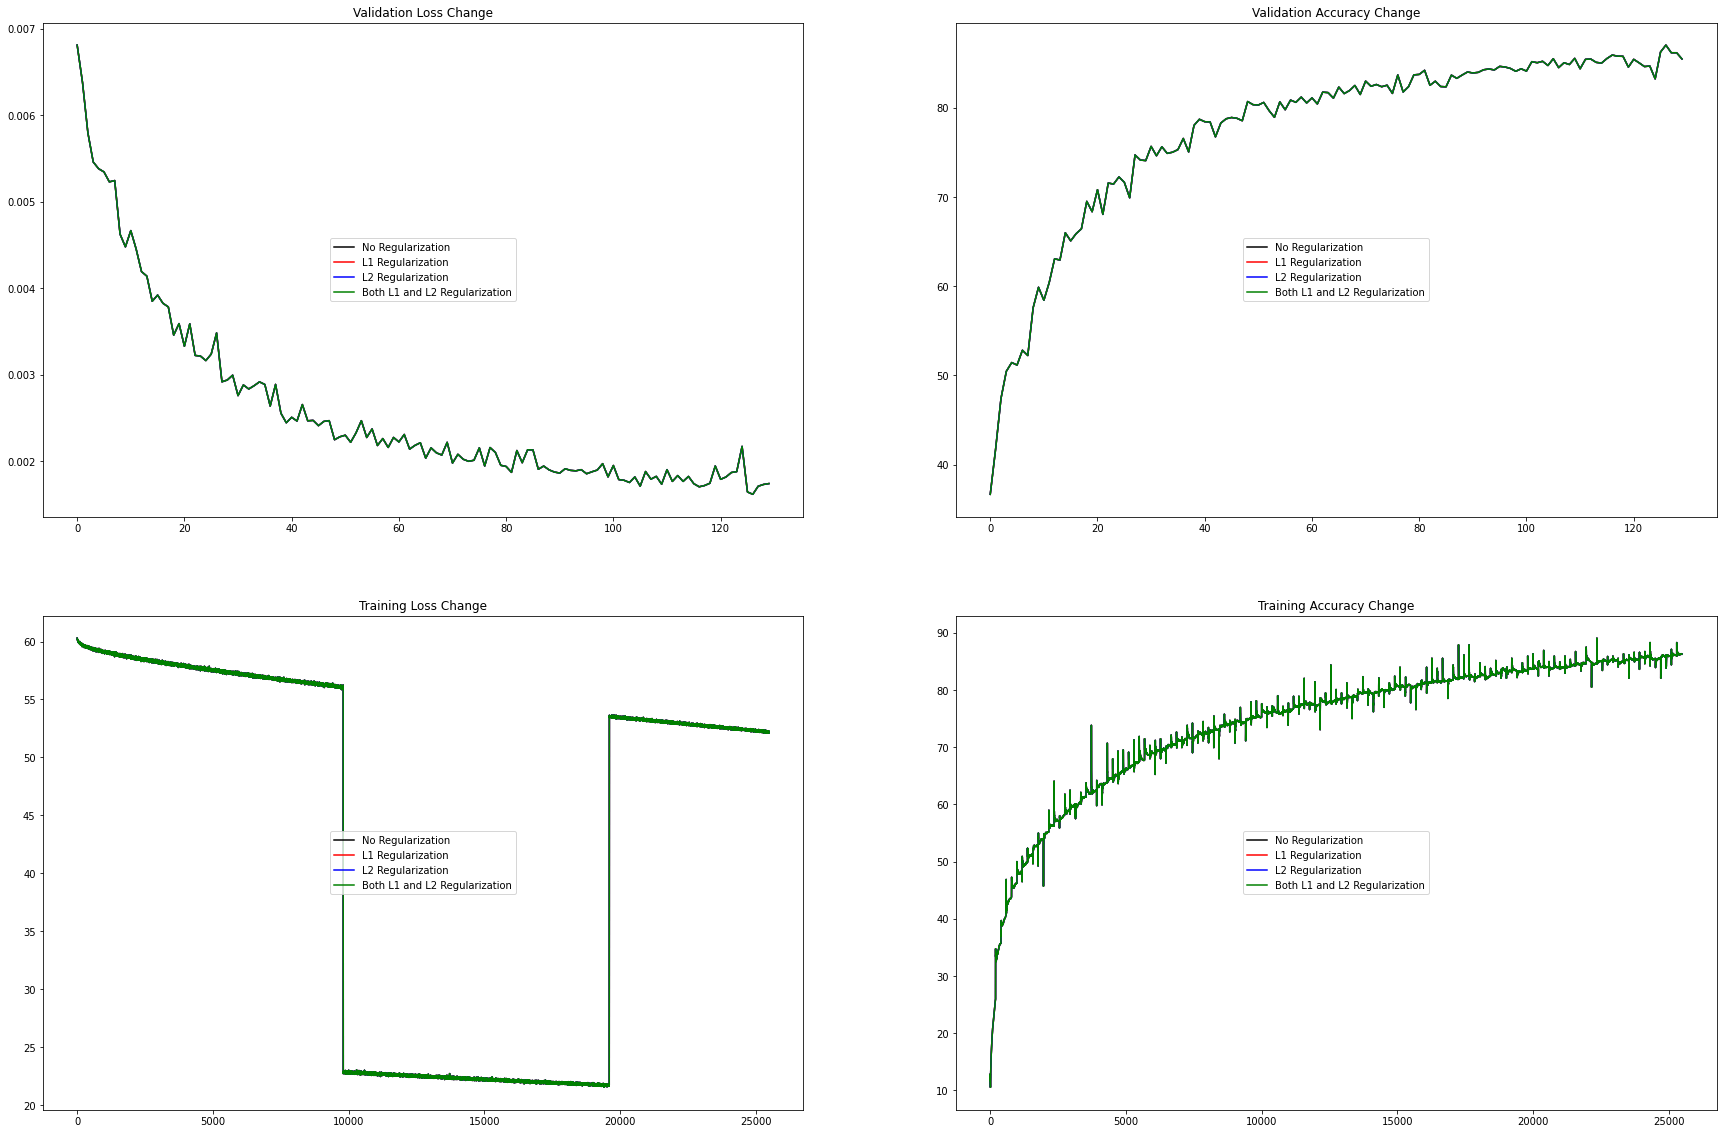

In [8]:
draw_accuracy_loss_change_graps(cifar_model,cifar_model,cifar_model,cifar_model)

GRADCAM VISUALIZATION

Mode set to GradCAM.
correct samples collected for gradcam= 30


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


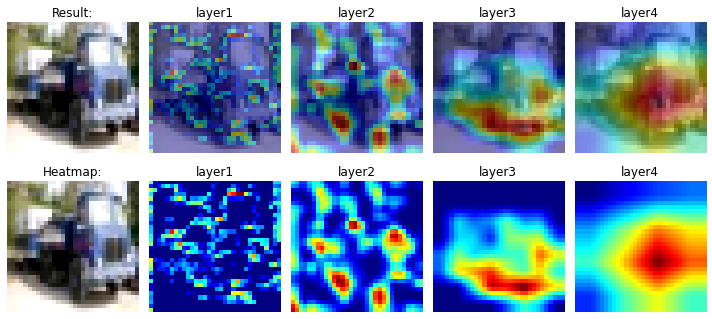

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

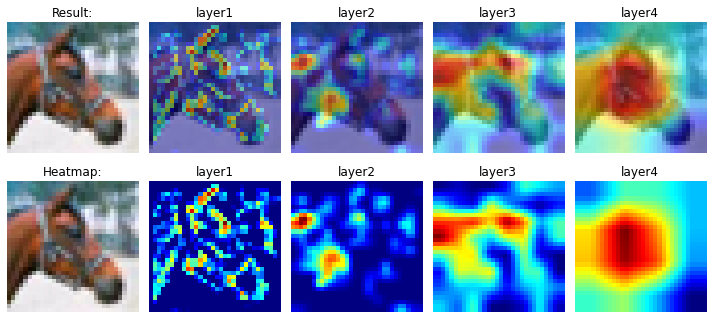

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

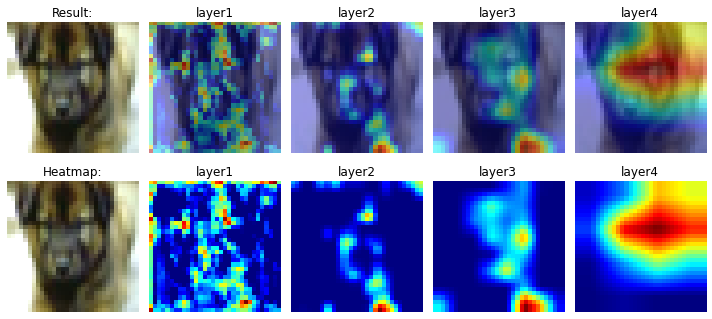

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

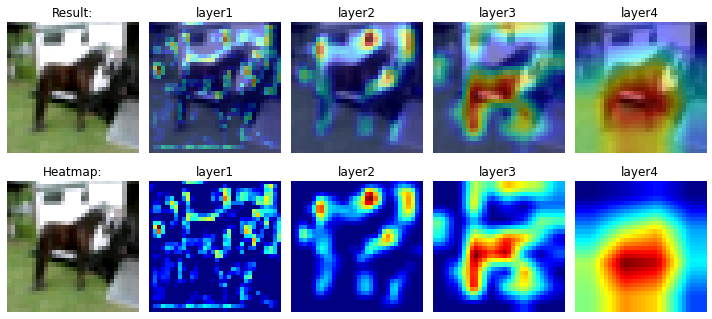

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

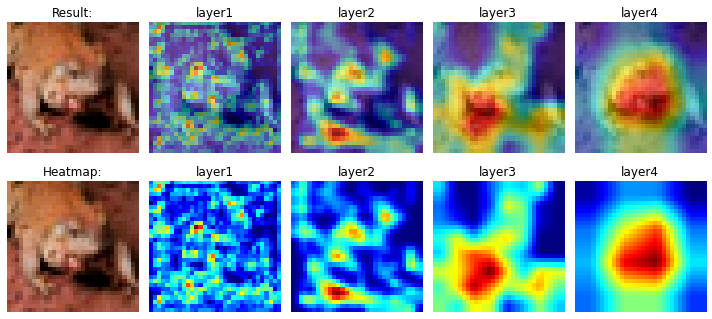

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

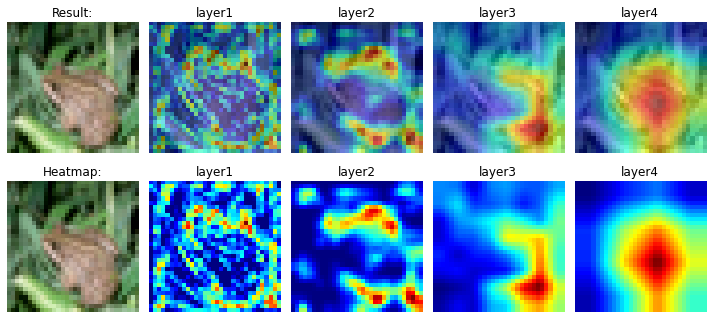

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

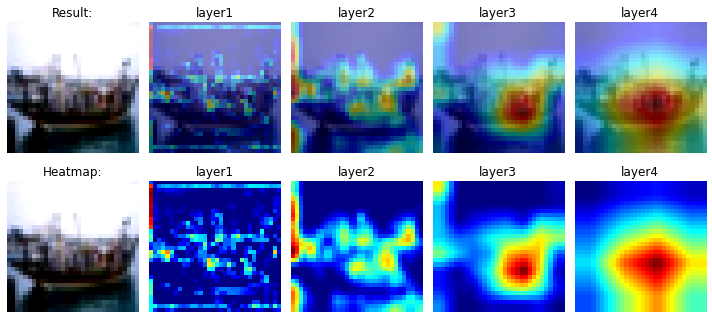

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

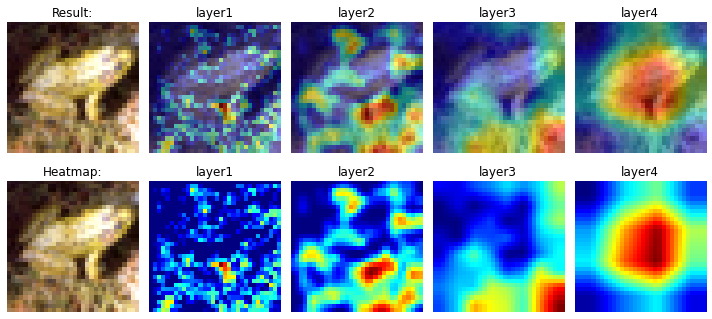

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

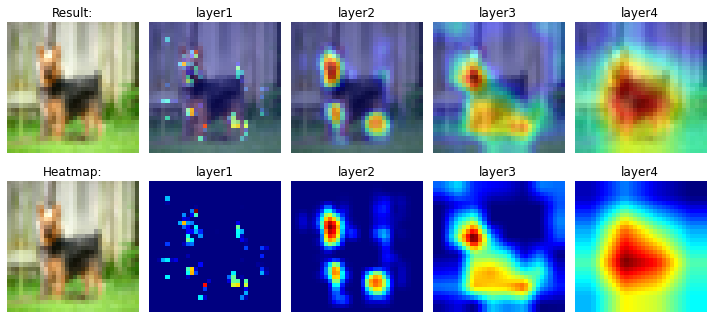

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

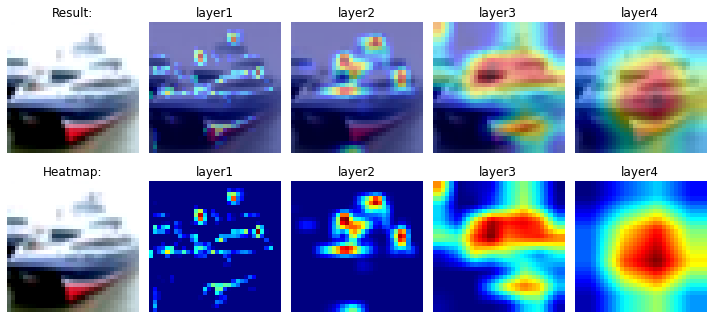

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

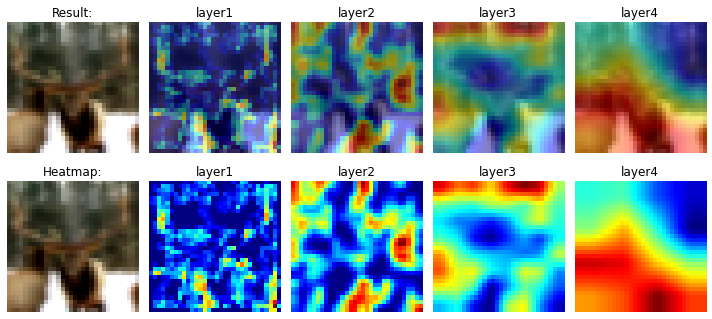

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

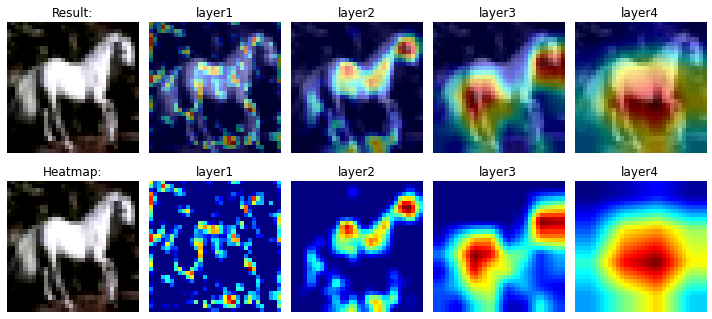

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

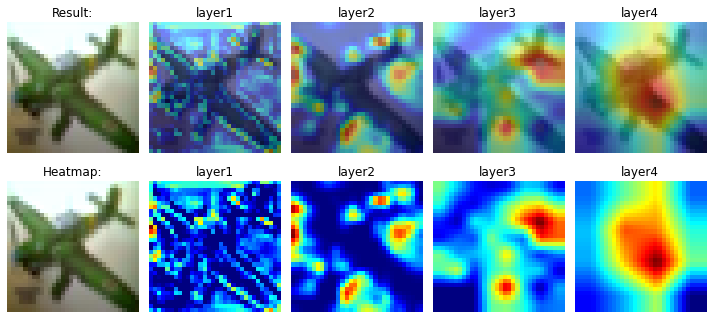

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

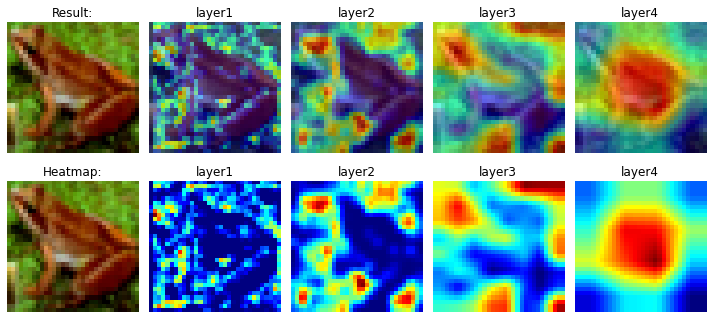

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

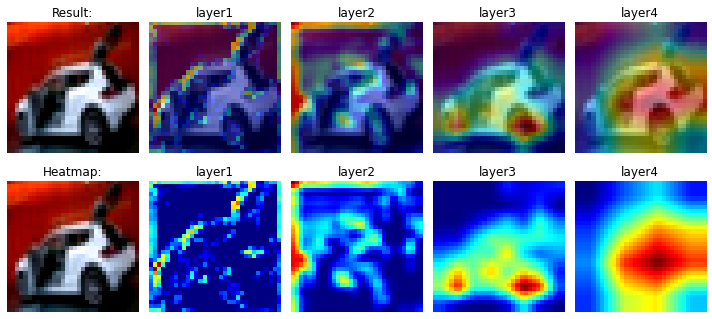

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

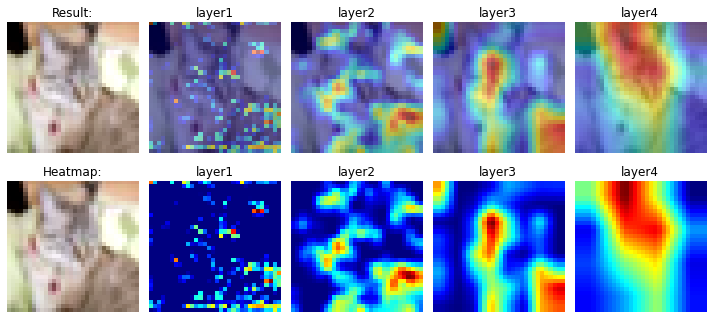

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

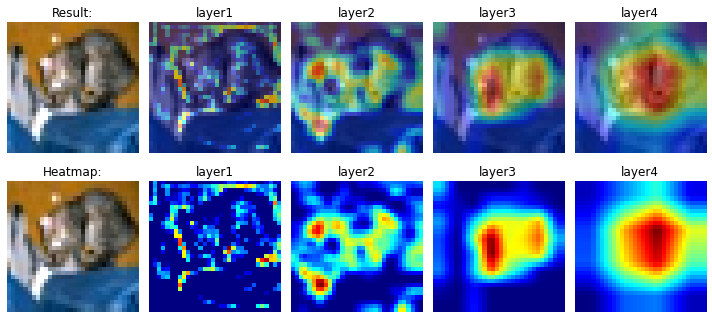

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

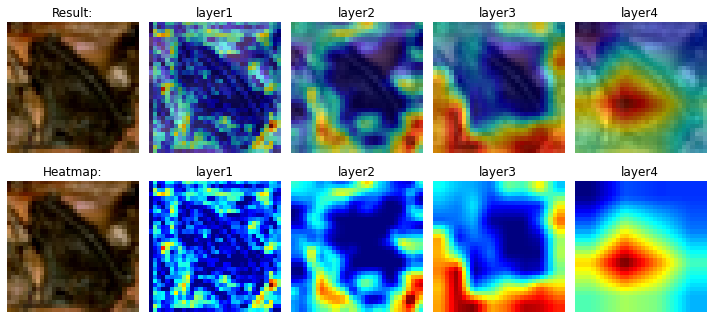

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

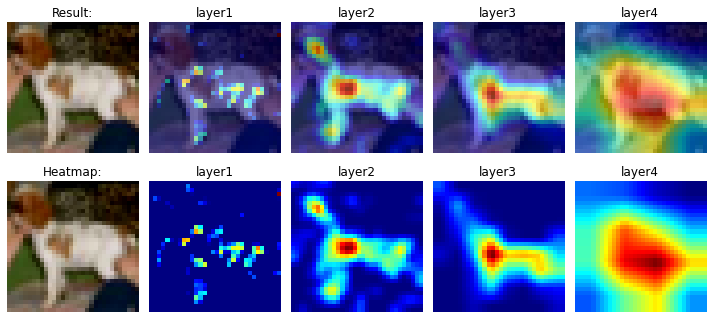

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

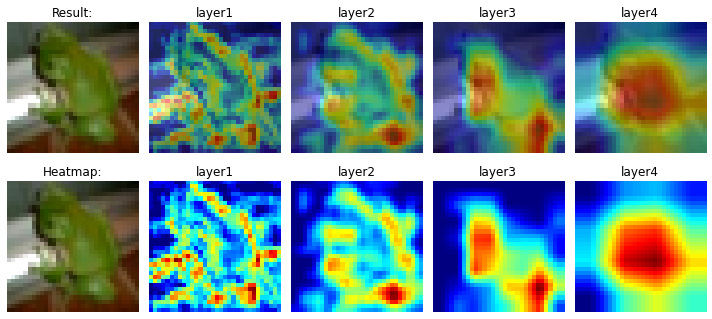

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

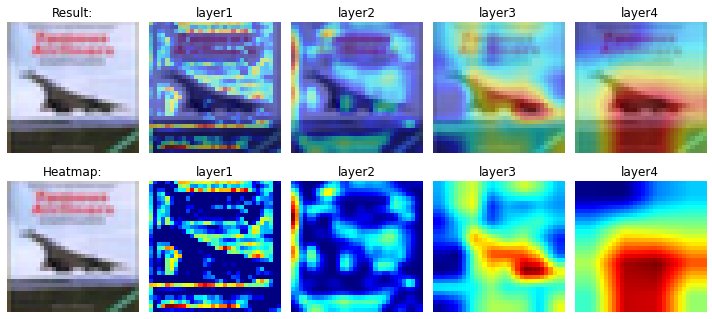

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

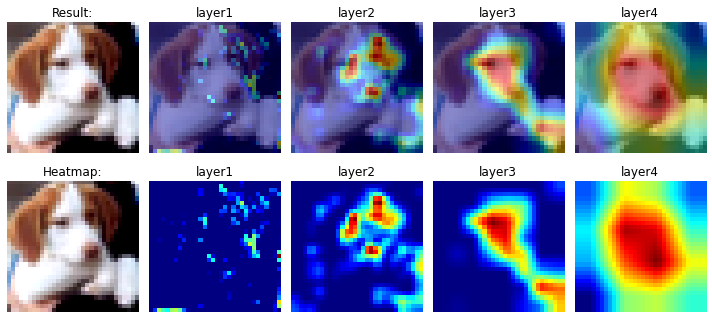

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

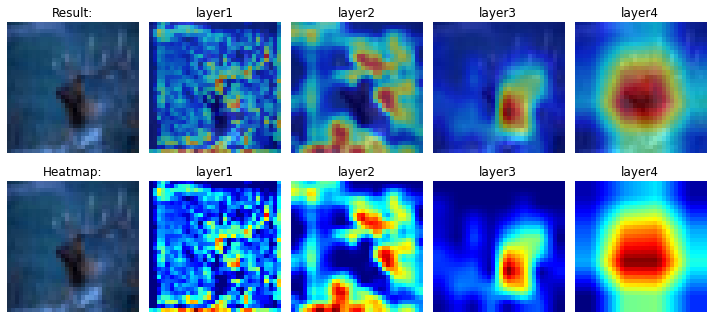

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

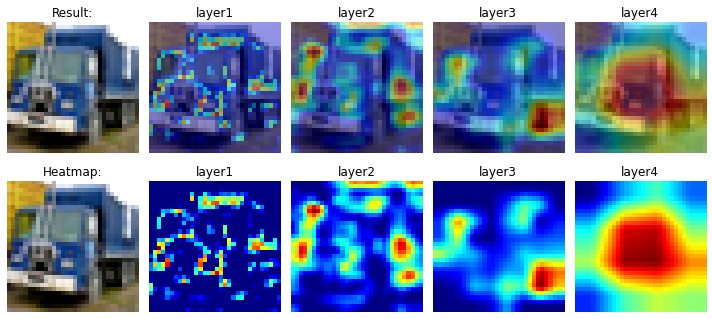

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

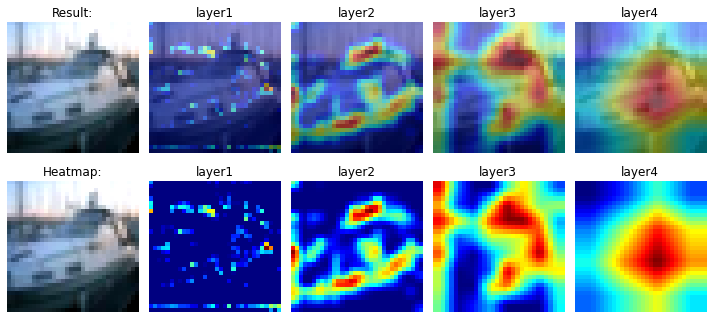

<Figure size 432x288 with 0 Axes>

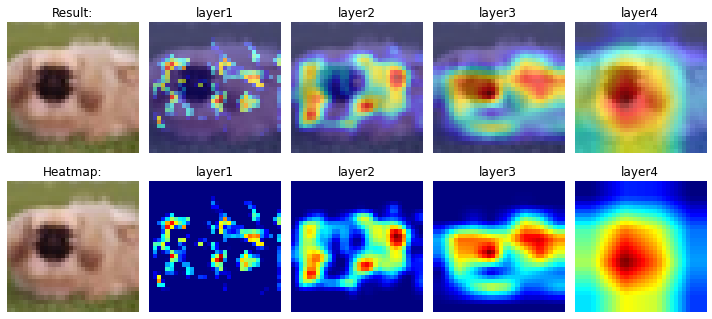

<Figure size 432x288 with 0 Axes>

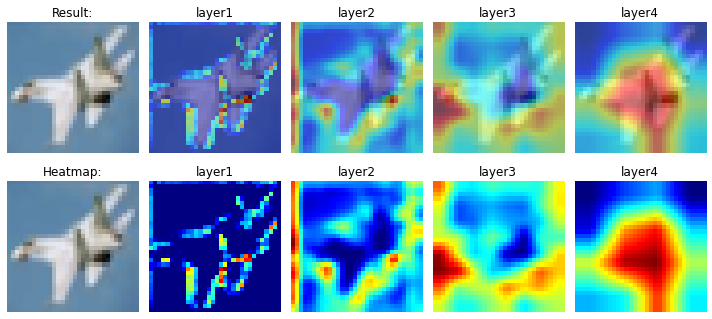

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

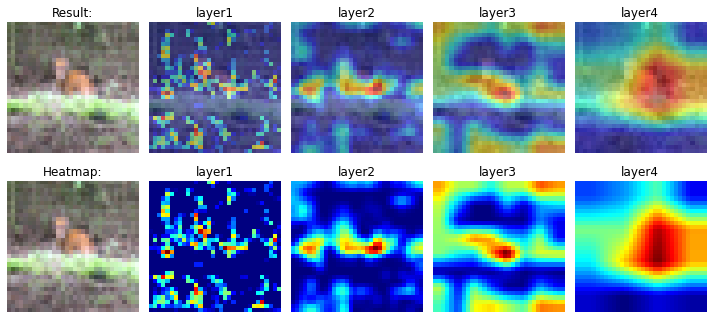

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

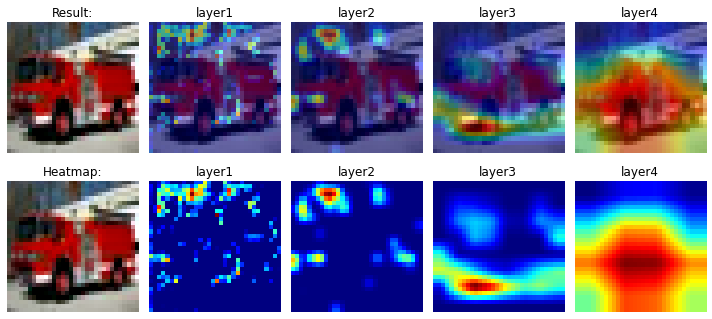

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

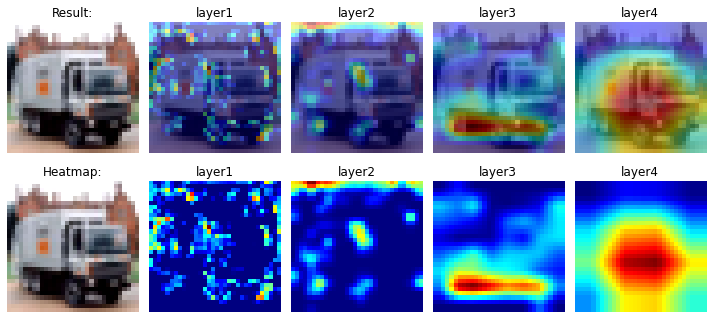

<Figure size 432x288 with 0 Axes>

In [12]:

import random
import torch
from torch import nn
import torch.nn as nn
from torch.nn import functional as F
from torchvision.utils import save_image
from torchvision.models import densenet121, resnet18, resnet152, resnet101
from torchvision.transforms import functional as tf
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from gradcam import gradcam as gd
from gradcam import gradcam_pp as gd_pp
from gradcam import visualize as vs 

gcam_object = vs.GradCAMView(
    cifar_model.m_model, ['layer1', 'layer2', 'layer3', 'layer4'],
    device, cifar.mean(), cifar.std()
)
print('correct samples collected for gradcam=',len(cifar_model.m_correct_samples))
if(len(cifar_model.m_correct_samples) > 1):
  images = [x['image'] for x in random.sample(cifar_model.m_correct_samples, 30)]
  gcam_object(images, 'grad_cam')


